In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Limpieza

In [2]:
data = pd.read_parquet('data/encuesta.parquet')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 1 to 109
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   response_id                              109 non-null    string        
 1   start_response                           109 non-null    datetime64[ns]
 2   complete_response                        109 non-null    datetime64[ns]
 3   age                                      109 non-null    category      
 4   sex                                      109 non-null    category      
 5   years_studying                           109 non-null    int64         
 6   degree                                   109 non-null    category      
 7   infrastructure_score                     109 non-null    category      
 8   notice_infrastructure_improvement        109 non-null    category      
 9   infrastructure_changes_raw               109 non

# Graficos

In [3]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette("viridis")

Text(0.5, 0, 'Conteo')

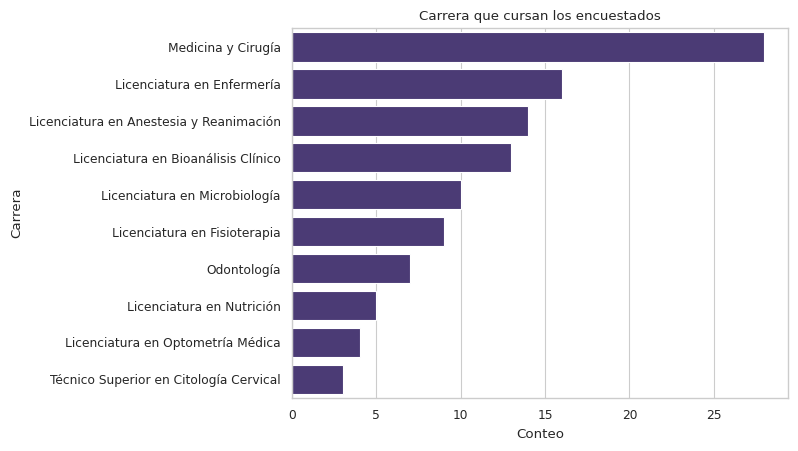

In [4]:
sns.countplot(
    data=data,
    y='degree',
    order=data['degree'].value_counts().index
)
plt.title("Carrera que cursan los encuestados")
plt.ylabel("Carrera")
plt.xlabel("Conteo")

Text(0.5, 0, 'Conteo')

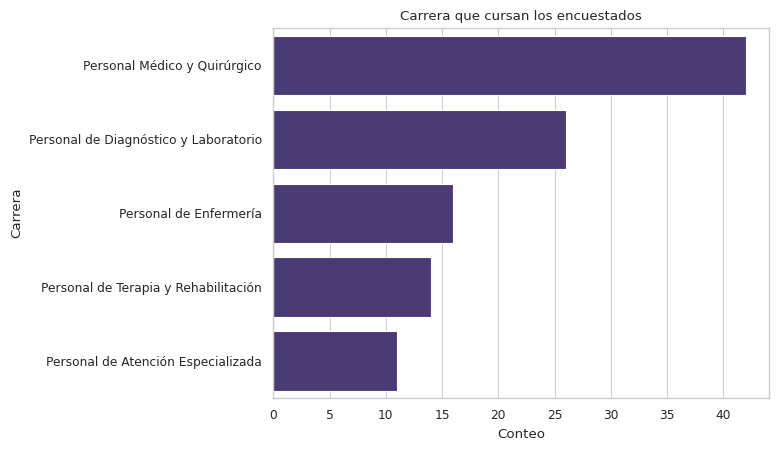

In [5]:
sns.countplot(
    data=data,
    y='degree_category',
    order=data['degree_category'].value_counts().index
)
plt.title("Carrera que cursan los encuestados")
plt.ylabel("Carrera")
plt.xlabel("Conteo")

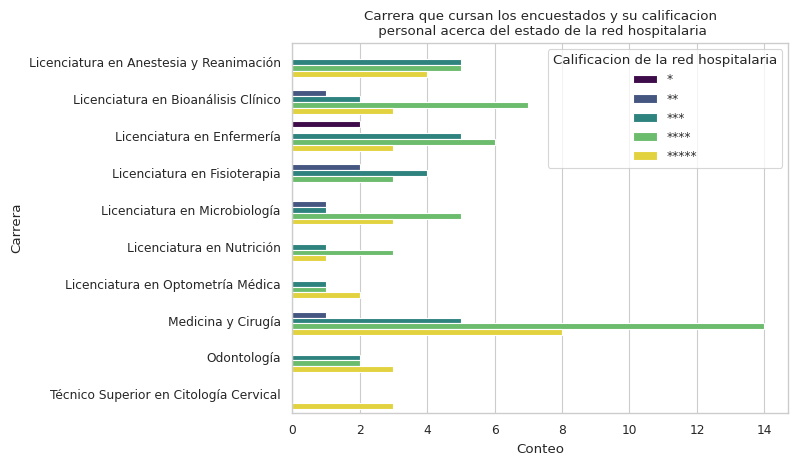

In [6]:
ax = sns.countplot(data=data, y='degree',
                   hue='modernization_score', palette="viridis")
plt.title("Carrera que cursan los encuestados y su calificacion\n personal acerca del estado de la red hospitalaria")
plt.ylabel("Carrera")
plt.xlabel("Conteo")
ax.legend(
    title="Calificacion de la red hospitalaria",
    labels=[
        '*',
        '**',
        '***',
        '****',
        '*****'
    ]
)

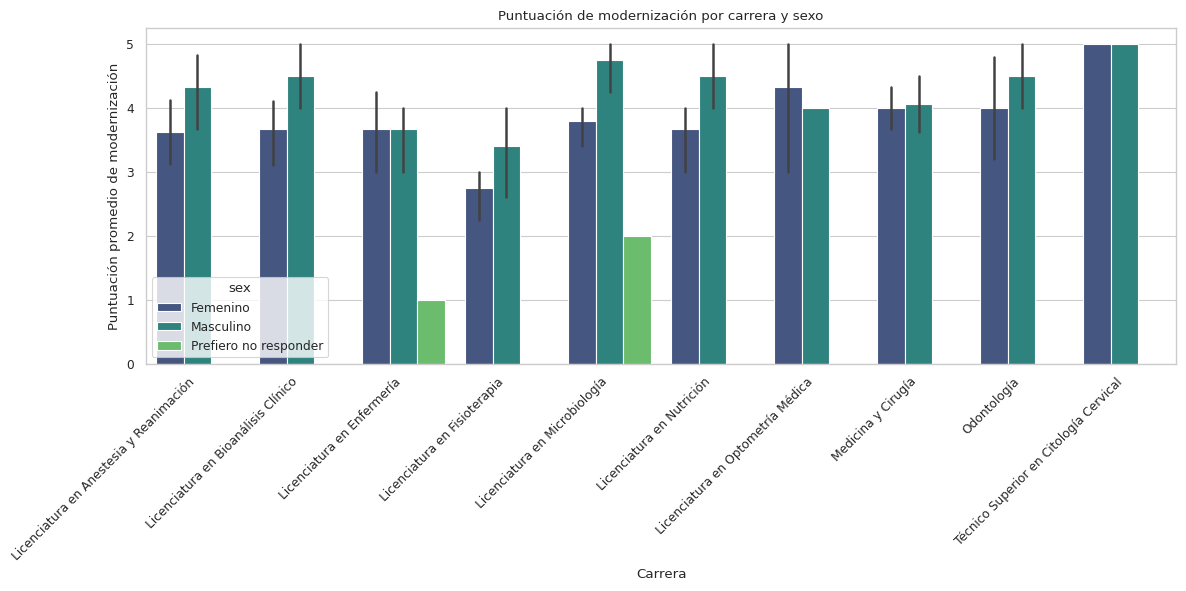

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='degree', y='modernization_score',
            hue='sex', palette='viridis')
plt.title('Puntuación de modernización por carrera y sexo')
plt.xlabel('Carrera')
plt.ylabel('Puntuación promedio de modernización')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()